In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file

Saving diabetes.csv to diabetes.csv


In [3]:
df = pd.read_csv("diabetes.csv", header=None)
df.head()  # Display the first few rows

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


**Preprocess the data**

In [4]:
column_names = ["DescFeature_1", "DescFeature_2", "DescFeature_3", "DescFeature_4", "DescFeature_5", "DescFeature_6", "DescFeature_7", "DescFeature_8", "Diabetic"] # Add column names
df.columns = column_names
df.head()

,DescFeature_1,DescFeature_2,DescFeature_3,DescFeature_4,DescFeature_5,DescFeature_6,DescFeature_7,DescFeature_8,Diabetic
0,-0.294118,0.487437,0.180328,-0.292929,0.000000,0.001490,-0.531170,-0.033333,0
1,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
2,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
3,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
4,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0


In [5]:
print(df.isnull().sum())  # Count missing values in each column

DescFeature_1    0
DescFeature_2    0
DescFeature_3    0
DescFeature_4    0
DescFeature_5    0
DescFeature_6    0
DescFeature_7    0
DescFeature_8    0
Diabetic         0
dtype: int64


In [6]:
print(df.describe().T[['min', 'max']]) #Range of each column

                    min  max
DescFeature_1 -0.882353  1.0
DescFeature_2 -0.557789  1.0
DescFeature_3 -0.606557  1.0
DescFeature_4 -0.858586  1.0
DescFeature_5 -0.966903  1.0
DescFeature_6 -0.457526  1.0
DescFeature_7 -0.994876  1.0
DescFeature_8 -0.966667  1.0
Diabetic       0.000000  1.0


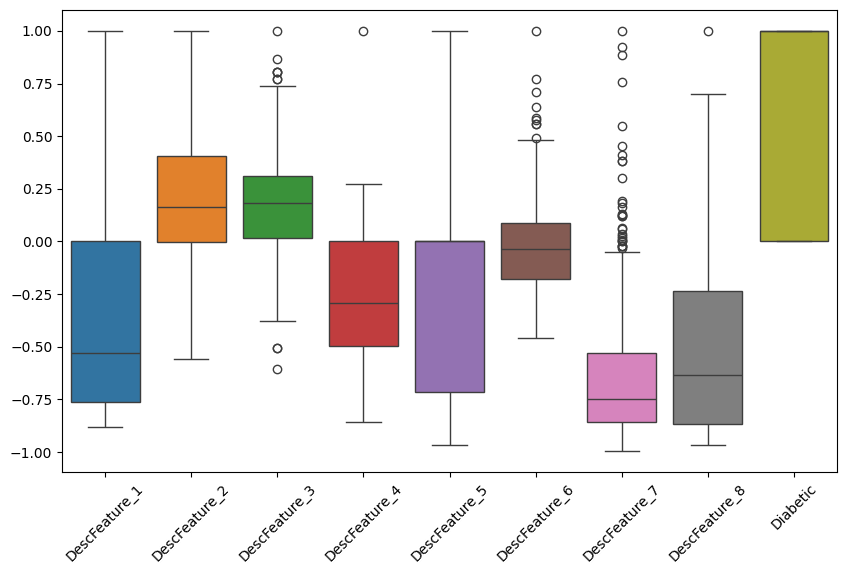

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45) # Outliers
plt.show()

In [8]:
from scipy.stats.mstats import winsorize
columns_to_filter = ['DescFeature_3', 'DescFeature_6', 'DescFeature_7']  # Only these 3 columns have more outliers from the above we can see

# Apply winsorization to limit extreme values
df[columns_to_filter] = df[columns_to_filter].apply(lambda x: winsorize(x, limits=[0, 0.025]))

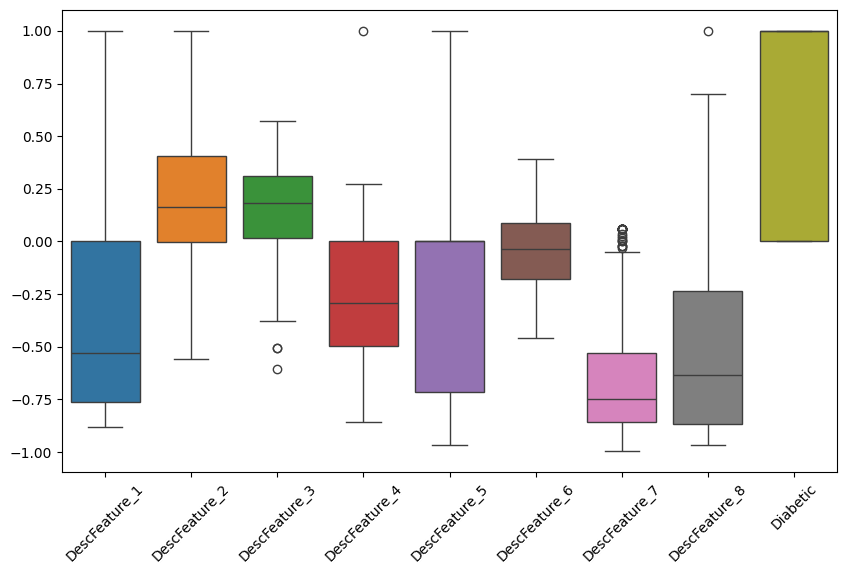

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df)
plt.xticks(rotation=45) #After removing extreme outliers
plt.show()

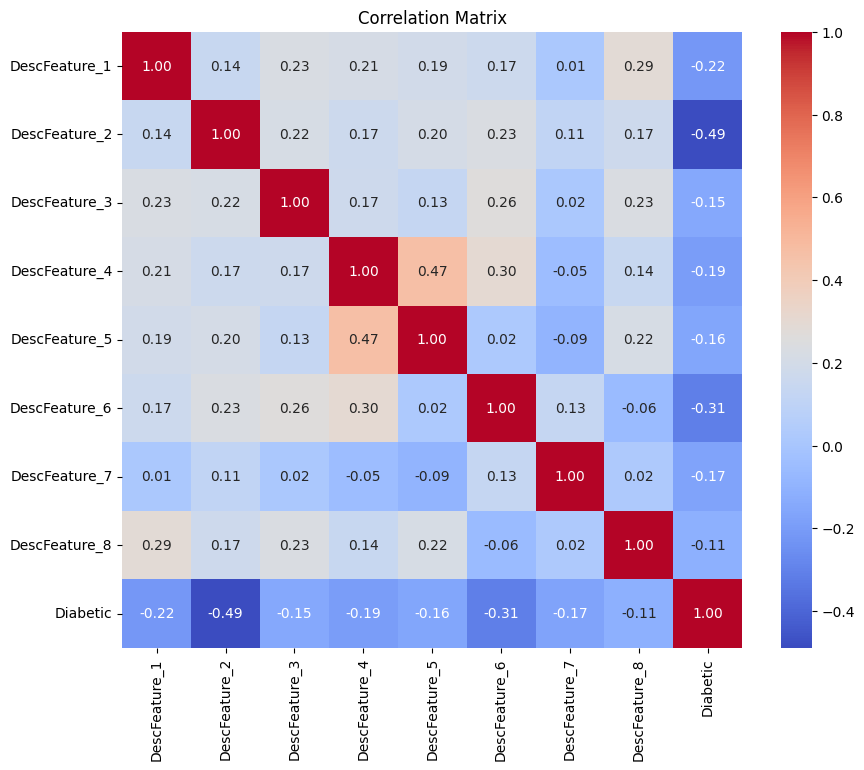

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

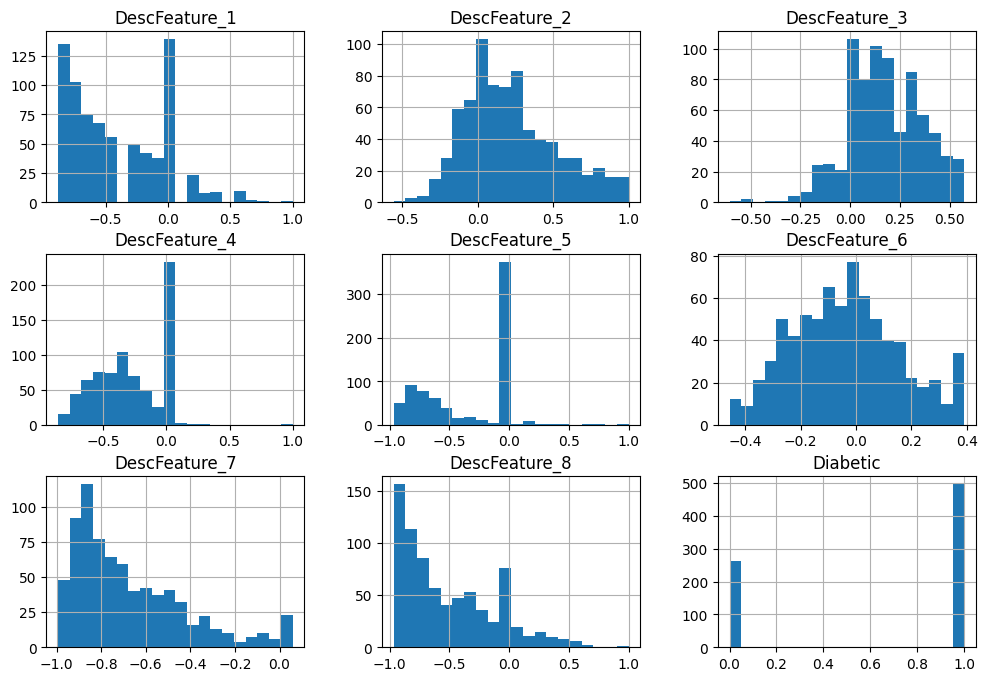

In [11]:
df.hist(figsize=(12,8), bins=20)
plt.show()

In [12]:
dataset = df.values
dataset

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]])

In [13]:
X = dataset[:,0:8]
y= dataset[:,8]
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [14]:
# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3, random_state=42)

**Using PyTorch-Base Model**

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(8, 32)
        self.fc2 = nn.Linear(32, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.activation(self.fc2(x))
        return x


model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Create datasets and data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# Training loop
for epoch in range(50):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Evaluation
model.eval()
with torch.no_grad():
    test_loss = 0
    correct = 0
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        test_loss += criterion(outputs, batch_y).item()
        predictions = (outputs > 0.5).float()
        correct += (predictions == batch_y).sum().item()
    accuracy = correct / len(test_dataset)
    print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1, Loss: 0.7120
Epoch 2, Loss: 0.7107
Epoch 3, Loss: 0.6931
Epoch 4, Loss: 0.6854
Epoch 5, Loss: 0.7164
Epoch 6, Loss: 0.7139
Epoch 7, Loss: 0.7152
Epoch 8, Loss: 0.7095
Epoch 9, Loss: 0.7114
Epoch 10, Loss: 0.6929
Epoch 11, Loss: 0.6999
Epoch 12, Loss: 0.6988
Epoch 13, Loss: 0.7021
Epoch 14, Loss: 0.6893
Epoch 15, Loss: 0.6985
Epoch 16, Loss: 0.6895
Epoch 17, Loss: 0.6921
Epoch 18, Loss: 0.6888
Epoch 19, Loss: 0.7000
Epoch 20, Loss: 0.6843
Epoch 21, Loss: 0.6897
Epoch 22, Loss: 0.6903
Epoch 23, Loss: 0.6851
Epoch 24, Loss: 0.6726
Epoch 25, Loss: 0.6929
Epoch 26, Loss: 0.6680
Epoch 27, Loss: 0.6827
Epoch 28, Loss: 0.6791
Epoch 29, Loss: 0.6590
Epoch 30, Loss: 0.6893
Epoch 31, Loss: 0.6930
Epoch 32, Loss: 0.6964
Epoch 33, Loss: 0.6659
Epoch 34, Loss: 0.6623
Epoch 35, Loss: 0.6904
Epoch 36, Loss: 0.6872
Epoch 37, Loss: 0.6760
Epoch 38, Loss: 0.6766
Epoch 39, Loss: 0.6646
Epoch 40, Loss: 0.6792
Epoch 41, Loss: 0.6744
Epoch 42, Loss: 0.6656
Epoch 43, Loss: 0.6768
Epoch 44, Loss: 0.69

**Improved Model**

In [17]:
class ImprovedNN(nn.Module):
    def __init__(self):
        super(ImprovedNN, self).__init__()
        self.fc1 = nn.Linear(8, 32)  # Increased layers
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.activation(self.fc4(x))
        return x

# Initialize the modified model
improved_model = ImprovedNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(improved_model.parameters(), lr=0.01)

# Training loop for the modified model
for epoch in range(50):
    improved_model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = improved_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

# Evaluation of the modified model
improved_model.eval()
with torch.no_grad():
    test_loss = 0
    correct = 0
    for batch_X, batch_y in test_loader:
        outputs = improved_model(batch_X)
        test_loss += criterion(outputs, batch_y).item()
        predictions = (outputs > 0.5).float()
        correct += (predictions == batch_y).sum().item()
    accuracy = correct / len(test_dataset)
    print(f"Test Accuracy (Improved Model): {accuracy:.4f}")

Epoch 1, Loss: 0.6714
Epoch 2, Loss: 0.6179
Epoch 3, Loss: 0.5018
Epoch 4, Loss: 0.5180
Epoch 5, Loss: 0.4579
Epoch 6, Loss: 0.4044
Epoch 7, Loss: 0.5508
Epoch 8, Loss: 0.6197
Epoch 9, Loss: 0.2951
Epoch 10, Loss: 0.6599
Epoch 11, Loss: 0.4674
Epoch 12, Loss: 0.4465
Epoch 13, Loss: 0.3627
Epoch 14, Loss: 0.4502
Epoch 15, Loss: 0.5336
Epoch 16, Loss: 0.3036
Epoch 17, Loss: 0.5173
Epoch 18, Loss: 0.3807
Epoch 19, Loss: 0.5965
Epoch 20, Loss: 0.5924
Epoch 21, Loss: 0.2711
Epoch 22, Loss: 0.3916
Epoch 23, Loss: 0.3270
Epoch 24, Loss: 0.5602
Epoch 25, Loss: 0.4448
Epoch 26, Loss: 0.3380
Epoch 27, Loss: 0.4212
Epoch 28, Loss: 0.5936
Epoch 29, Loss: 0.4510
Epoch 30, Loss: 0.4974
Epoch 31, Loss: 0.3782
Epoch 32, Loss: 0.6074
Epoch 33, Loss: 0.4626
Epoch 34, Loss: 0.2887
Epoch 35, Loss: 0.3670
Epoch 36, Loss: 0.3586
Epoch 37, Loss: 0.3580
Epoch 38, Loss: 0.3467
Epoch 39, Loss: 0.4112
Epoch 40, Loss: 0.2955
Epoch 41, Loss: 0.4375
Epoch 42, Loss: 0.4996
Epoch 43, Loss: 0.3676
Epoch 44, Loss: 0.39

**Base Model using Tensorflow**

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd',
              loss='binary_crossentropy', # Binary cross-entropy loss
              metrics=['accuracy'])   #Track Accuracy

model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=32, epochs=50)

#Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,377 (5.38 KB)

 Trainable params: 1,377 (5.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6200 - loss: 0.6848
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6203 - loss: 0.6875 
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6540 - loss: 0.6703 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6392 - loss: 0.6749 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6629 - loss: 0.6665 
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5974 - loss: 0.6917 
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6357 - loss: 0.6729 
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6467 - loss: 0.6701 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6703 - loss: 0.6536 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6347 - loss: 0.6712 
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6403 - loss: 0.6655 
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

**Improved Model using TensorFlow**

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the improved model
model = Sequential([
    Dense(128, activation='relu', input_shape=(8,)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    optimizer='sgd',
    loss='binary_crossentropy',  # Binary cross-entropy loss
    metrics=['accuracy']  # Track accuracy
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    X_train, y_train,
    batch_size=32, epochs=50
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy (Improved Model): {test_accuracy:.4f}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,977 (105.38 KB)

 Trainable params: 26,977 (105.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.6407 - loss: 0.6884
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6720 - loss: 0.6741
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6525 - loss: 0.6697 
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6510 - loss: 0.6645 
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6325 - loss: 0.6663 
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6300 - loss: 0.6650 
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6628 - loss: 0.6501 
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6516 - loss: 0.6524 
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6533 - loss: 0.6506 
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6628 - loss: 0.6444 
Epoch 11/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6455 - loss: 0.6504 
Epoch 12/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0

**Compare Base model and Improved model by PyTorch**

Accruacy of Base Model --> 0.6754

Accuracy of Improved Model --> 0.7763

The improved model, with more layers ,and changes in the learning rate achieved higher accuracy compared to the base model. This is because the increased complexity allows the model to learn more intricate patterns in the data.

Changes made: Changed the optimization algorithm from SGD to Adam.Added more layers to the network, allowing it to learn more complex patterns in the data.


**Compare Base Model and Improved Model by TensorFlow**

Accruacy of Base Model --> 0.6754

Accuracy of Improved Model --> 0.7939

The improved model successfully leveraged deeper architecture and regularization to boost accuracy.

Changes made: Added more layers and neurons to the network, allowing it to learn more complex patterns in the data.

**Conclusion**

Comparing the performance of base and improved models using both PyTorch and TensorFlow. The base models achieved a lesser accuracy in both models. After implementing several changes to the model architecture and training parameters, the performace of the improved models were much better.

In PyTorch, the improved model achieved an accuracy of 77.63%, a 10.09% increase over the base model. This improvement can be is due to the addition of more layers, which allowed the model to capture more intricate patterns in the data. Additionally, the optimization algorithm was changed from SGD to Adam, which is better than SGD.

Similarly, in TensorFlow, the improved model reached an accuracy of 79.39%, surpassing the base model by 11.85%. The key changes in this model included adding more layers and neurons, allowing for better feature extraction.

In both frameworks, the improved models leveraged deeper architectures and optimized training parameters, resulting in higher accuracy. These enhancements demonstrate the importance of refining model complexity and hyperparameters to improve predictive performance. The improvements underline how fine-tuning the model’s architecture and training settings can make a significant difference in the outcomes of machine learning tasks.